# Capstone Project  Week 3 - Part 1

## Assignment

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

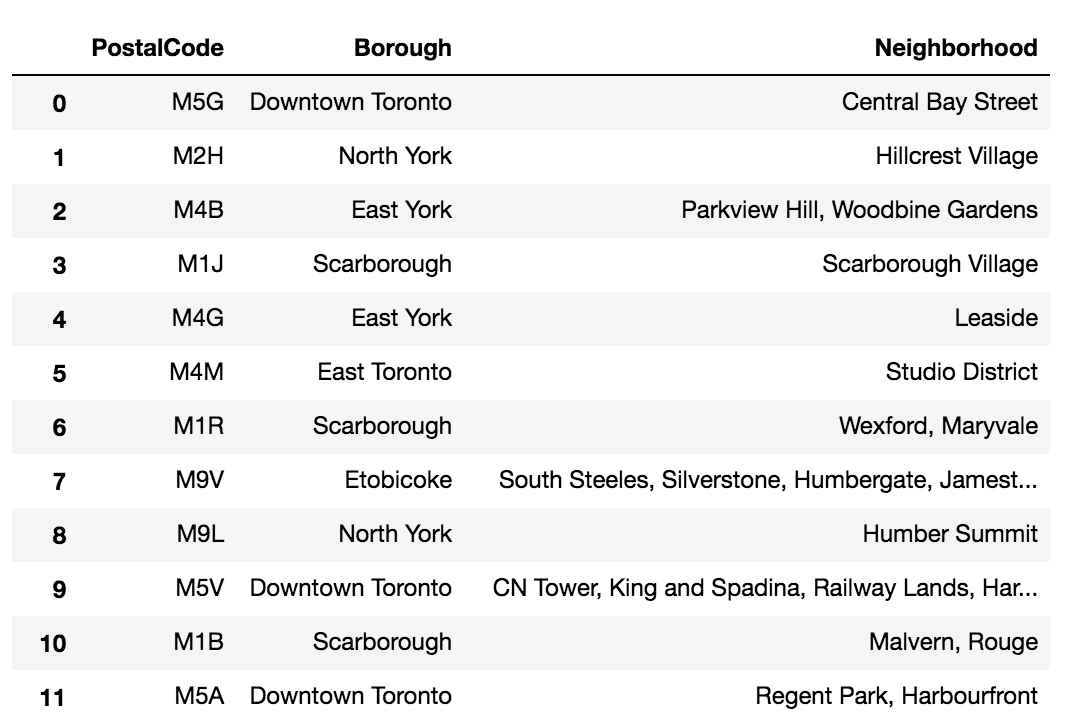
3. To create the above dataframe:

    - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
    - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
    - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
    - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
    - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
    - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)



## Get Data about Toronto

#### Load libraries required to pull and clean data from Wikipedia

In [19]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle requests
import requests 

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


#### Initialize Web Scraper and pull data from Wikipedia page

In [20]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(url,'lxml')

#### Extract html tags for table \< table\> and rows \< tr\>

In [21]:
#Find table
table = soup.find('table')

#Find ands extract rows
rows = []
table_rows = table.select('tr')
for row in table_rows:
    rows.append(row.get_text())

print("Rows loaded: ",len(rows))

Rows loaded:  288


#### Build a pandas dataframe from loaded rows, split entries into columns and name columns

_**Note:** dataframe has two extra columns_

In [22]:
#Build dataframe, split columns and update columns
df_str = pd.DataFrame(rows)
df_raw = df_str[0].str.split('\n', expand=True)

#Assign names to columns and remove header row
df_raw.rename(columns=df_raw.iloc[0], inplace=True)
df_raw.drop(df_raw.index[0], inplace=True)

print(df_raw.shape)
df_raw.head(8)

(287, 5)


,,Postcode,Borough,Neighbourhood,
1,,M1A,Not assigned,Not assigned,
2,,M2A,Not assigned,Not assigned,
3,,M3A,North York,Parkwoods,
4,,M4A,North York,Victoria Village,
5,,M5A,Downtown Toronto,Harbourfront,
6,,M6A,North York,Lawrence Heights,
7,,M6A,North York,Lawrence Manor,
8,,M7A,Queen's Park,Not assigned,


#### Extract columns required

_**Note:** two extrac columns removed_

In [23]:
#Extract relevant columns
df_pure = df_raw[['Postcode', 'Borough', 'Neighbourhood']]

#Adjust column naming
df_pure.columns = ['Postcode', 'Borough', 'Neighborhood']

print(df_pure.shape)
df_pure.head(8)

(287, 3)


,Postcode,Borough,Neighborhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned


#### Drop rows which have "Not Assigned" in Borough

In [24]:
# Filter entries which have 'Not assigned' in Borough column
borough_notassigned = df_pure[df_pure['Borough'] == 'Not assigned'].index
    
# Delete these row indexes from dataFrame
df_clean = df_pure.drop(borough_notassigned)

print(df_clean.shape)
df_clean.head(8)

(210, 3)


,Postcode,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Downtown Toronto,Queen's Park
11,M1B,Scarborough,Rouge


#### Set Neighbourhoods with value "Not Assigned" to the value of the Borough

In [25]:
#Replace Not assigned in Neighbourhood to value of Borough
df_clean.loc[(df_clean.Neighborhood == 'Not assigned'),'Neighborhood'] = df_clean.Borough

print(df_clean.shape)
df_clean.head(8)

(210, 3)


,Postcode,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
10,M9A,Downtown Toronto,Queen's Park
11,M1B,Scarborough,Rouge


#### Group data on Postalcode and Borough

In [26]:
#Merge same PostCodes
df_grouped = df_clean.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()

print(df_grouped.shape)
df_grouped.head(8)

(103, 3)


,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"


#### Save dataframe in CSV 

In [27]:
df_grouped.to_csv('capstone-data-package-part-1.csv', index = False)
print("Saved.")

Saved.
